## Plotting

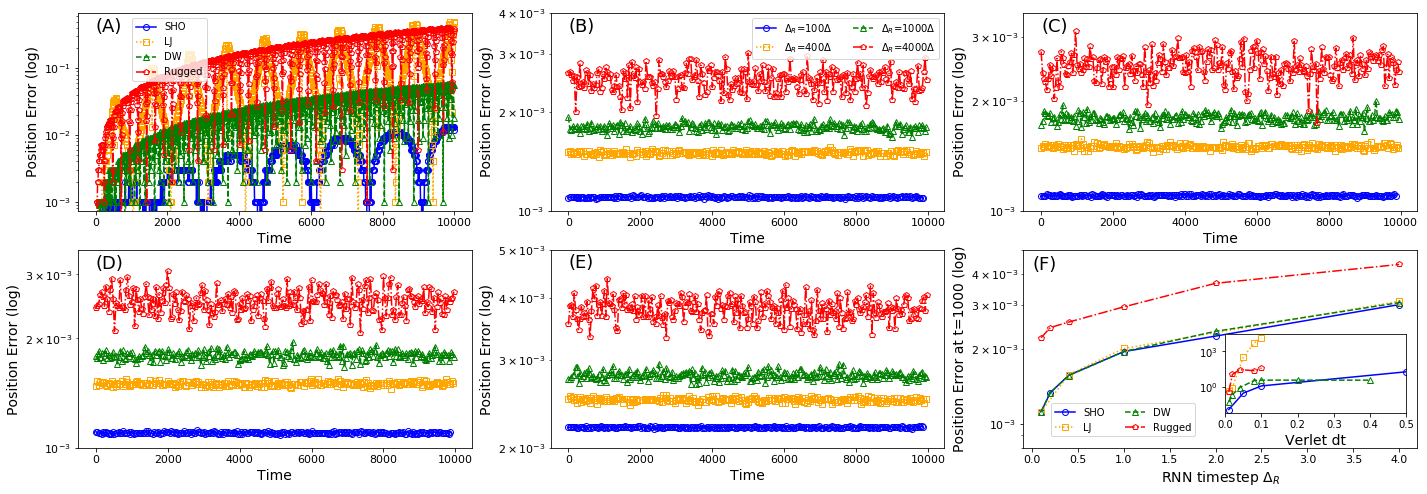

In [25]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#fig, ax1 = plt.subplots()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 8))

ax_insert = inset_axes(ax[1,2], height="100%", width="100%", loc='lower left', bbox_to_anchor=(0.5,0.15,0.46,0.40), bbox_transform=ax[1,2].transAxes)

#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-',':', '--', '-.']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
markerstyles = ["o", "s", "^", "p"]
colors = ['blue', 'orange', 'green', 'red']


##############################
delta_base = 0.001
how_freq =1000
time_ = 10000

error_data_array = []

plot_count = [0,0,0,0,0,0]
count = 0

detltaT = [0.01]
#detltaT = [0.02, 0.04]
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (10.0, 1.0, time_, deltaT_)
    
    simulated_result_file = np.loadtxt('sho_plot_data/plotdata_SHO_mass={}_k={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_//delta_base)
    
    how_freq_ = int(how_freq//factor_)
    #print(simulated_result_file[:,1].shape)
    #print(correct_[0:-1:factor_,1].shape)
    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error_data**2)) 
    error_data_array.append(np.max(error_data))
       
    ax[0, 0].plot(simulated_result_file[::how_freq_,0], np.sqrt(error_data[::how_freq_]**2), label='SHO',
                  color=colors[plot_count[0]],linestyle=linestyles[plot_count[0]], marker= markerstyles[plot_count[0]], markerfacecolor='none')
    plot_count[0] += 1


delta_T_choices= np.array([1, 4, 10, 40])
index=0
for key in delta_T_choices:
    
    deltaT_ = key*100*delta_base
    
    RNN_result = np.loadtxt('sho_plot_data/plotdata_RNN-SHO_mass={}_k={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    error = RNN_result[:,1]-RNN_result[:,2]
    
    how_freq_=40//key
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 
    ax[0, 1].plot(RNN_result[::how_freq_,0],  np.sqrt(error[::how_freq_]**2), label="$\Delta_R$=" + str(int(deltaT_/10/0.001))+"$\Delta$" +lgnd_text,
                 color=colors[index],linestyle=linestyles[index], marker= markerstyles[index], markerfacecolor='none')
    error_data_array.append(np.max(error))
    index += 1 
    
    

ax[0, 1].set_yscale('log')
#ax[0, 1].set_title("RNN SHO (m={}, k={})".format(params__[0], params__[1]))
ax[0, 1].set_ylabel('Position Error (log)', fontsize=14)
ax[0, 1].set_xlabel('Time', fontsize=14)
ax[0, 1].set_ylim(1*(10**-3), 4*(10**-3))
ax[0, 1].legend(loc='upper right', ncol=2)
ax[0, 1].tick_params(axis='both', which='major', labelsize=11)
ax[0, 1].tick_params(axis='both', which='minor', labelsize=11)

##############################
how_freq =1000
delta_base = 0.001
time__ = 10000
params__ = (1.0, 2.0, time__, delta_base)

#detltaT = [0.01, 0.02, 0.05, 0.08,  0.1]
detltaT = [0.01]
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, 2.0, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('lj_plot_data/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_//delta_base)
    
    how_freq_ = int(how_freq//factor_)
    #print(simulated_result_file[:,1].shape)
    #print(correct_[0:-1:factor_,1].shape)
    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error_data**2)) 
       
    ax[0, 0].plot(simulated_result_file[::how_freq_,0], np.sqrt(error_data[::how_freq_]**2), label='LJ',
                 color=colors[plot_count[0]],linestyle=linestyles[plot_count[0]], marker= markerstyles[plot_count[0]], markerfacecolor='none')
    plot_count[0] += 1

delta_T_choices= np.array([1, 4, 10, 40])
index=0
for key in delta_T_choices:
    
    deltaT_ = key*100*delta_base
    
    RNN_result = np.loadtxt('lj_plot_data/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    error = RNN_result[:,1]-RNN_result[:,2]
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 
    how_freq_=40//key

    ax[0, 2].plot(RNN_result[::how_freq_,0],  np.sqrt(error[::how_freq_]**2), label="$\Delta_R$=" + str(int(deltaT_/10/0.001))+"$\Delta$" +lgnd_text,
                 color=colors[index],linestyle=linestyles[index], marker= markerstyles[index], markerfacecolor='none')
    index += 1 
    
ax[0, 2].set_yscale('log')
#ax[0, 2].set_title("RNN LJ (m={}, x0={})".format(params__[0], params__[1]))
ax[0, 2].set_ylabel('Position Error (log)', fontsize=14)
ax[0, 2].set_xlabel('Time', fontsize=14)
ax[0, 2].set_ylim(1*(10**-3), 3.5*(10**-3))
ax[0, 2].tick_params(axis='both', which='major', labelsize=11)
ax[0, 2].tick_params(axis='both', which='minor', labelsize=11)
#ax[0, 2].legend(loc='upper left')
##############################

delta_base = 0.001
how_freq =1000
time_ = 10000

#detltaT = [0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4]
detltaT = [0.01]

for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, -2.0, time_, deltaT_)
    
    simulated_result_file = np.loadtxt('double_well_plot_data/plotdata_double_well_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
    
    factor_ = int(deltaT_//delta_base)
    
    how_freq_ = int(how_freq//factor_)

    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error_data**2)) 
          
    ax[0, 0].plot(simulated_result_file[::how_freq_,0], np.sqrt(error_data[::how_freq_]**2), label='DW',
                 color=colors[plot_count[0]],linestyle=linestyles[plot_count[0]], marker= markerstyles[plot_count[0]], markerfacecolor='none')
    plot_count[0] += 1

delta_T_choices= np.array([1, 4, 10, 40])
index=0
for key in delta_T_choices:
    
    deltaT_ = key*100*delta_base
    
    RNN_result = np.loadtxt('double_well_plot_data/plotdata_RNN-double_well_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    error = RNN_result[:,1]-RNN_result[:,2]
    how_freq_=40//key
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 
    ax[1, 0].plot(RNN_result[::how_freq_,0],  np.sqrt(error[::how_freq_]**2), label="$\Delta_R$=" + str(int(deltaT_/10/0.001))+"$\Delta$" +lgnd_text,
                 color=colors[index],linestyle=linestyles[index], marker= markerstyles[index], markerfacecolor='none')
    index += 1 


ax[1, 0].set_yscale('log')
#ax[1, 0].set_title("RNN Double-Well (m={}, x0={})".format(params__[0], params__[1]))
ax[1, 0].set_ylabel('Position Error (log)', fontsize=14)
ax[1, 0].set_xlabel('Time', fontsize=14)
ax[1, 0].set_ylim(1*(10**-3), 3.5*(10**-3))
#ax[1, 0].legend(loc='upper left')
ax[1, 0].tick_params(axis='both', which='major', labelsize=11)
ax[1, 0].tick_params(axis='both', which='minor', labelsize=11)

##############################

how_freq =1000
delta_base = 0.001
time__ = 10000
params__ = (1.0, -6.0, time__, delta_base)


#detltaT = [0.01, 0.02, 0.04, 0.08, 0.1]
detltaT = [0.01]

for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, -6.0, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('rugged_plot_data/plotdata_rugged_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_//delta_base)
    
    how_freq_ = int(how_freq//factor_)
    #print(simulated_result_file[:,1].shape)
    #print(correct_[0:-1:factor_,1].shape)
    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error_data**2)) 
  
    ax[0, 0].plot(simulated_result_file[::how_freq_,0], np.sqrt(error_data[::how_freq_]**2), label='Rugged',
                 color=colors[plot_count[0]],linestyle=linestyles[plot_count[0]], marker= markerstyles[plot_count[0]], markerfacecolor='none')

    plot_count[0] += 1
    
    
delta_T_choices= np.array([1, 4, 10, 40])
index=0
for key in delta_T_choices:
    
    deltaT_ = key*100*delta_base
    
    RNN_result = np.loadtxt('rugged_plot_data/plotdata_RNN-rugged_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    error = RNN_result[:,1]-RNN_result[:,2]
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 
    how_freq_=40//key
    
    ax[1, 1].plot(RNN_result[::how_freq_,0],  np.sqrt(error[::how_freq_]**2), label='RNN ΔT ='+ str(deltaT_/10) +lgnd_text,
                 color=colors[index],linestyle=linestyles[index], marker= markerstyles[index], markerfacecolor='none')
    index += 1 

ax[1, 1].set_yscale('log')
#ax[1, 1].set_title("RNN Rugged (m={}, x0={})".format(params__[0], params__[1]))
ax[1, 1].set_ylabel('Position Error (log)', fontsize=14)
ax[1, 1].set_xlabel('Time', fontsize=14)
ax[1, 1].set_ylim(2*(10**-3), 5*(10**-3))
#ax[1, 1].legend(loc='upper left')
ax[1, 1].tick_params(axis='both', which='major', labelsize=11)
ax[1, 1].tick_params(axis='both', which='minor', labelsize=11)

##############################

ax[0, 0].set_yscale('log')
#ax[0, 0].set_title("MD")
#ax[0, 0].legend(loc='upper left')
ax[0, 0].legend(bbox_to_anchor=(0.34,0.63))
ax[0, 0].set_ylabel('Position Error (log)', fontsize=14)
ax[0, 0].set_xlabel('Time', fontsize=14)
ax[0, 0].tick_params(axis='both', which='major', labelsize=11)
ax[0, 0].tick_params(axis='both', which='minor', labelsize=11)

# Set common labels
#fig.text(0.5, 0.04, 'Time', ha='center', va='center', fontsize=14)
#fig.text(0.06, 0.5, 'Squared Position Error(log)', ha='center', va='center', rotation='vertical', fontsize=14)

#fig.text(0.375, 0.25, 'Period(T)~19.8', ha='center', va='center', fontsize=14)
#fig.text(0.375, 0.75, 'T~5.0', ha='center', va='center', fontsize=14)
#fig.text(0.875, 0.25, 'T~4.7', ha='center', va='center', fontsize=14)
#fig.text(0.875, 0.75, 'T~4.9', ha='center', va='center', fontsize=14)


#################################### Final plot ############################

select_index_ = -1
delta_base = 0.001
how_freq =1000
time_ = 10000

detltaT = [0.01, 0.05, 0.1, 0.5, 1.0]
deltaT_=0.01
params__ = (10.0, 1.0, time_, deltaT_)
error_data_array = []

for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (10.0, 1.0, time_, deltaT_)
    simulated_result_file = np.loadtxt('sho_plot_data/plotdata_SHO_mass={}_k={}_t={}_deltaT={}.dat'.format(*params__))
    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    error_data_array.append(np.max(error_data))

error_data_array = np.array(error_data_array)
count_val=0
ax_insert.plot(detltaT, np.sqrt(error_data_array**2), label='SHO', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')  
    
error_data_array = []
delta_T_choices= np.array([1, 2, 4, 10, 20, 40])

index=0
for key in delta_T_choices:
    deltaT_ = key*100*delta_base
    RNN_result = np.loadtxt('sho_plot_data/plotdata_RNN-SHO_mass={}_k={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    error = RNN_result[:,1]-RNN_result[:,2]
    error_data_array.append(np.max(error))
    index += 1 


error_data_array = np.array(error_data_array)  
count_val=0
ax[1, 2].plot(delta_T_choices/10,  np.sqrt(error_data_array**2), label='SHO', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')
######################################################

how_freq =1000
delta_base = 0.001
time__ = 10000
params__ = (1.0, 2.0, time__, delta_base)
error_data_array = []
detltaT = [0.01, 0.02, 0.05, 0.08,  0.1]

for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, 2.0, time__, deltaT_)
    simulated_result_file = np.loadtxt('lj_plot_data/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    error_data_array.append(np.max(error_data))

error_data_array = np.array(error_data_array)  

count_val=1
ax_insert.plot(detltaT, np.sqrt(error_data_array**2), label='LJ', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')    
    
error_data_array = []
delta_T_choices= np.array([1, 4, 10, 40])
index=0
for key in delta_T_choices:
    deltaT_ = key*100*delta_base
    RNN_result = np.loadtxt('lj_plot_data/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    error = RNN_result[:,1]-RNN_result[:,2]
    error_data_array.append(np.max(error))
    index += 1 
error_data_array = np.array(error_data_array)  

count_val=1
ax[1, 2].plot(delta_T_choices/10,  np.sqrt(error_data_array**2), label='LJ', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')
######################################################

delta_base = 0.001
how_freq =1000
time_ = 10000
error_data_array = []
detltaT = [0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4]

for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, -2.0, time_, deltaT_)
    simulated_result_file = np.loadtxt('double_well_plot_data/plotdata_double_well_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    error_data_array.append(np.max(error_data))

count_val=2
error_data_array = np.array(error_data_array)     
ax_insert.plot(detltaT, np.sqrt(error_data_array**2), label='DW', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')


error_data_array = []
delta_T_choices= np.array([1, 2,  4, 10, 20, 40])
index=0
for key in delta_T_choices:
    deltaT_ = key*100*delta_base
    RNN_result = np.loadtxt('double_well_plot_data/plotdata_RNN-double_well_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    error = RNN_result[:,1]-RNN_result[:,2]
    error_data_array.append(np.max(error))
    index += 1 

count_val=2
error_data_array = np.array(error_data_array)    
ax[1, 2].plot(delta_T_choices/10,  np.sqrt(error_data_array**2), label='DW', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')


######################################################
how_freq =1000
delta_base = 0.001
time__ = 10000
params__ = (1.0, -6.0, time__, delta_base)


detltaT = [0.01, 0.02, 0.04, 0.08, 0.1]

error_data_array = []
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, -6.0, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('rugged_plot_data/plotdata_rugged_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
    factor_ = int(deltaT_//delta_base)
    how_freq_ = int(how_freq//factor_)
    error_data = simulated_result_file[:,1]-simulated_result_file[:,2]
    
    error_data_array.append(np.max(error_data))
count_val=3    
error_data_array = np.array(error_data_array)     
ax_insert.plot(detltaT, np.sqrt(error_data_array**2), label='Rugged', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')

error_data_array = []
delta_T_choices= np.array([1, 2, 4, 10, 20, 40])
index=0
for key in delta_T_choices:
    deltaT_ = key*100*delta_base
    RNN_result = np.loadtxt('rugged_plot_data/plotdata_RNN-rugged_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    error = RNN_result[:,1]-RNN_result[:,2]
    error_data_array.append(np.max(error))
    index += 1
count_val=3
error_data_array = np.array(error_data_array)    
ax[1, 2].plot(delta_T_choices/10,  np.sqrt(error_data_array**2), label='Rugged', color=colors[count_val],linestyle=linestyles[count_val], marker= markerstyles[count_val], markerfacecolor='none')

ax_insert.set_yscale('log')
#ax_insert.set_title("MD")
ax_insert.set_xlim(0, 0.5)
ax_insert.set_xlabel('Verlet dt', fontsize=14)
#ax_insert.legend(loc='upper right')
#ax[0].legend(loc='lower right')

ax[1, 2].set_yscale('log')
#ax[1, 2].set_title("RNN")
#ax[1, 2].legend(bbox_to_anchor=(0.2428,0.63))
ax[1, 2].legend(bbox_to_anchor=(0.45,0.25), ncol=2)
#ax[1, 2].legend(loc='best', ncol=2)
#ax[1, 2].legend(loc='lower left', ncol=2)
ax[1, 2].set_ylabel('Position Error at t=1000 (log)', fontsize=14)
ax[1, 2].set_xlabel('RNN timestep $\Delta_R$', fontsize=14)
ax[1, 2].set_ylim(8*(10**-4), 5*(10**-3))
ax[1, 2].tick_params(axis='both', which='major', labelsize=11)
ax[1, 2].tick_params(axis='both', which='minor', labelsize=11)
##############################

ax[0,0].annotate('(A)', (0, 0.35*10**0), fontsize=18)
ax[0,1].annotate('(B)', (0, 3.5*10**-3), fontsize=18)
ax[0,2].annotate('(C)', (0, 3.1*10**-3), fontsize=18)
ax[1,0].annotate('(D)', (0, 3.1*10**-3), fontsize=18)
ax[1,1].annotate('(E)', (0, 4.6*10**-3), fontsize=18)
ax[1,2].annotate('(F)', (0.001, 4.15*10**-3), fontsize=18)

plt.show()